In [1]:
import pandas as pd
import numpy as np
import os
import json
import altair as alt

In [2]:
JSON_FILE = os.path.join("..", 
                         "results", 
                         "mammalian_REM2", 
                         "mammalian_REM2_codons.SA.FilterOutliers.fasta.BGM.json")


posteriorThreshold = 0.5

print(JSON_FILE)

..\results\mammalian_REM2\mammalian_REM2_codons.SA.FilterOutliers.fasta.BGM.json


In [3]:
def getBGMData(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["MLE"]["content"]
#end method

def getBGMHeaders(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["MLE"]["headers"]
#end method

def getBGMInput(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["input"]
#end method

In [4]:
columns = getBGMHeaders(JSON_FILE)
headers = [x[0] for x in columns]

# For FUBAR
#headers.append("Z")
#headers.append("Y")
#headers

headers2= []
for item in headers:
    item = item.replace('â€“', "-")
    headers2.append(item)
headers2

['Site 1',
 'Site 2',
 'P [Site 1 -> Site 2]',
 'P [Site 2 -> Site 1]',
 'P [Site 1 <-> Site 2]',
 'Site 1 subs',
 'Site 2 subs',
 'Shared subs']

### Selected Sites

In [5]:
df = pd.DataFrame(getBGMData(JSON_FILE), columns=headers2, dtype = float)
#df.drop('Z', axis=1, inplace=True)
#df.drop('Y', axis=1, inplace=True)

#df["omega"] = df["beta"] / df["alpha"]

df.index += 1
#df["Site"] = df.index

df

,Site 1,Site 2,P [Site 1 -> Site 2],P [Site 2 -> Site 1],P [Site 1 <-> Site 2],Site 1 subs,Site 2 subs,Shared subs
1,1.0,2.0,0.001550,0.001599,0.003149,1.0,3.0,0.0
2,1.0,4.0,0.001433,0.000532,0.001965,1.0,9.0,0.0
3,1.0,5.0,0.004678,0.001700,0.006378,1.0,2.0,0.0
4,1.0,6.0,0.001094,0.000601,0.001695,1.0,12.0,0.0
5,1.0,9.0,0.000751,0.001506,0.002257,1.0,6.0,0.0
...,...,...,...,...,...,...,...,...
32892,623.0,626.0,0.002899,0.001414,0.004313,1.0,2.0,0.0
32893,623.0,627.0,0.159307,0.151098,0.310405,1.0,3.0,1.0
32894,625.0,626.0,0.000301,0.000732,0.001033,13.0,2.0,0.0
32895,625.0,627.0,0.000230,0.000567,0.000797,13.0,3.0,0.0


In [6]:
df.columns

Index(['Site 1', 'Site 2', 'P [Site 1 -> Site 2]', 'P [Site 2 -> Site 1]',
       'P [Site 1 <-> Site 2]', 'Site 1 subs', 'Site 2 subs', 'Shared subs'],
      dtype='object')

In [7]:
df.columns[2]

'P [Site 1 -> Site 2]'

## Coevolving sites

In [8]:
#coevolving_sites_1 = df[df["P [Site 1 -> Site 2]"] >= posteriorThreshold]
coevolving_sites_1 = df[df[df.columns[2]] >= posteriorThreshold]

coevolving_sites_2 = df[df[df.columns[3]] >= posteriorThreshold]

coevolving_sites_3 = df[df[df.columns[4]] >= posteriorThreshold]

In [9]:
coevolving_sites_1

,Site 1,Site 2,P [Site 1 -> Site 2],P [Site 2 -> Site 1],P [Site 1 <-> Site 2],Site 1 subs,Site 2 subs,Shared subs
7250,48.0,55.0,0.660918,0.032240,0.693158,4.0,14.0,3.0
7421,48.0,517.0,0.852450,0.025880,0.878330,4.0,12.0,3.0
9318,59.0,163.0,0.616346,0.165379,0.781725,13.0,14.0,5.0
9936,63.0,129.0,0.587618,0.066978,0.654596,6.0,10.0,3.0
12276,76.0,261.0,0.599129,0.276066,0.875195,14.0,6.0,4.0
12808,79.0,102.0,0.853441,0.091668,0.945109,6.0,5.0,3.0
13056,80.0,166.0,0.567932,0.336430,0.904362,17.0,5.0,4.0
13212,81.0,116.0,0.919303,0.061097,0.980401,19.0,14.0,7.0
18523,128.0,613.0,0.575882,0.316128,0.892011,10.0,4.0,3.0
25425,251.0,329.0,0.748923,0.008962,0.757886,2.0,7.0,2.0


In [10]:
coevolving_sites_2

,Site 1,Site 2,P [Site 1 -> Site 2],P [Site 2 -> Site 1],P [Site 1 <-> Site 2],Site 1 subs,Site 2 subs,Shared subs
5494,30.0,164.0,0.035478,0.542271,0.577749,20.0,7.0,4.0
7136,47.0,297.0,0.057617,0.547445,0.605062,6.0,2.0,2.0
9769,61.0,251.0,0.098380,0.646951,0.745331,6.0,2.0,2.0
11541,70.0,562.0,0.217165,0.710289,0.927454,6.0,27.0,5.0
13252,81.0,164.0,0.194208,0.758199,0.952407,19.0,7.0,5.0
16136,114.0,299.0,0.153484,0.650562,0.804046,7.0,2.0,2.0
17549,122.0,251.0,0.022337,0.727879,0.750216,7.0,2.0,2.0
23607,170.0,297.0,0.037447,0.717077,0.754523,4.0,2.0,2.0
30033,359.0,603.0,0.219288,0.730587,0.949875,13.0,6.0,4.0


In [11]:
coevolving_sites_3

,Site 1,Site 2,P [Site 1 -> Site 2],P [Site 2 -> Site 1],P [Site 1 <-> Site 2],Site 1 subs,Site 2 subs,Shared subs
25,1.0,33.0,0.355303,0.238115,0.593419,1.0,2.0,1.0
1660,10.0,295.0,0.390198,0.336007,0.726205,11.0,9.0,4.0
1827,11.0,93.0,0.292089,0.461715,0.753804,1.0,1.0,1.0
4971,28.0,84.0,0.470602,0.227357,0.697959,5.0,10.0,3.0
5494,30.0,164.0,0.035478,0.542271,0.577749,20.0,7.0,4.0
7136,47.0,297.0,0.057617,0.547445,0.605062,6.0,2.0,2.0
7250,48.0,55.0,0.660918,0.032240,0.693158,4.0,14.0,3.0
7268,48.0,76.0,0.457533,0.102253,0.559787,4.0,14.0,3.0
7421,48.0,517.0,0.852450,0.025880,0.878330,4.0,12.0,3.0
8151,54.0,63.0,0.388826,0.125686,0.514513,3.0,6.0,2.0


In [12]:
#coevolving_sites_3.to_csv("../tables/BDNF/BDNF_BGM_Table.csv", index=False)

coevolving_sites_3.to_csv( os.path.join("..", 
                                        "results", 
                                        "mammalian_REM2", 
                                        "mammalian_REM2_BGM_Results.csv"), 
                          index=False)

## Visualizations

In [13]:
# Basic plot
coevolving_sites_3["ProbS1andS2"] = coevolving_sites_3[df.columns[4]]

source = coevolving_sites_3

line = alt.Chart(source).mark_circle().encode(
    x ='Site 1',
    y ='Site 2',
    size = "Shared subs",
    color=alt.Color('ProbS1andS2', scale=alt.Scale(scheme='reds', reverse=False))
).properties(
    width=800,
    height=600)

line

<ipython-input-13-a35bb68de2b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coevolving_sites_3["ProbS1andS2"] = coevolving_sites_3[df.columns[4]]


alt.Chart(...)

## Figure legend.

In [14]:
## Summary

a = getBGMInput(JSON_FILE)["number of sites"]
b = len(coevolving_sites_3["Site 1"])

print("BGM analysis of your gene of interest found " + str(b) + " pairs of coevolving sites out of " + str(a) + " total sites to be statistically significant (posterior probability threshold " + str(posteriorThreshold) + ")." )


BGM analysis of your gene of interest found 49 pairs of coevolving sites out of 627 total sites to be statistically significant (posterior probability threshold 0.5).


# Network analysis

In [15]:
%matplotlib inline
import numpy as np
import networkx as nx
import altair as alt
import nx_altair as nxa
import matplotlib.pyplot as plt

In [16]:
df4 = coevolving_sites_3[["Site 1", "Site 2", "Shared subs", "ProbS1andS2"]]
df4 = df4.rename(columns={"Site 1": "From", 
                          "Site 2": "To",
                          "Shared subs": "Weight"})
df4

,From,To,Weight,ProbS1andS2
25,1.0,33.0,1.0,0.593419
1660,10.0,295.0,4.0,0.726205
1827,11.0,93.0,1.0,0.753804
4971,28.0,84.0,3.0,0.697959
5494,30.0,164.0,4.0,0.577749
7136,47.0,297.0,2.0,0.605062
7250,48.0,55.0,3.0,0.693158
7268,48.0,76.0,3.0,0.559787
7421,48.0,517.0,3.0,0.878330
8151,54.0,63.0,2.0,0.514513


In [17]:
df4 = df4.astype({"From":"int"})
df4 = df4.astype({"To":"int"})
df4 = df4.astype({"Weight":"int"})
df4.dtypes
df4

,From,To,Weight,ProbS1andS2
25,1,33,1,0.593419
1660,10,295,4,0.726205
1827,11,93,1,0.753804
4971,28,84,3,0.697959
5494,30,164,4,0.577749
7136,47,297,2,0.605062
7250,48,55,3,0.693158
7268,48,76,3,0.559787
7421,48,517,3,0.878330
8151,54,63,2,0.514513


In [18]:
df_AlnMap = pd.read_csv(os.path.join("..", 
                                     "results", 
                                     "mammalian_REM2", 
                                     "mammalian_REM2_codons.SA.FilterOutliers.fasta_AlignmentMap.csv"))
df_AlnMap.dtypes
df_AlnMap

,HumanSite,AlignmentSite
0,1,1
1,2,2
2,3,4
3,4,5
4,5,6
...,...,...
335,336,623
336,337,624
337,338,625
338,339,626


In [19]:
mapping = []

for site in df4["From"].to_list():
    if site in df_AlnMap["AlignmentSite"].to_list():
        for n, item in enumerate(df_AlnMap["AlignmentSite"].to_list()):
            if item == site:
                mapping.append(n+1)
                break
            #end if
        #end for
    else:
        mapping.append(np.nan)
    #end if
#end for

df4["HumanREM2_Site_1"] = mapping

mapping = []

for site in df4["To"].to_list():
    if site in df_AlnMap["AlignmentSite"].to_list():
        for n, item in enumerate(df_AlnMap["AlignmentSite"].to_list()):
            if item == site:
                mapping.append(n+1)
                break
            #end if
        #end for
    else:
        mapping.append(np.nan)
    #end if
#end for

df4["HumanREM2_Site_2"] = mapping

# Save csv
#df.to_csv( os.path.join("..", "results", "mammalian_REM2", "mammalian_REM2_FEL_Results.csv"), index=False)

df4

,From,To,Weight,ProbS1andS2,HumanREM2_Site_1,HumanREM2_Site_2
25,1,33,1,0.593419,1.0,28.0
1660,10,295,4,0.726205,7.0,176.0
1827,11,93,1,0.753804,NaN,71.0
4971,28,84,3,0.697959,23.0,62.0
5494,30,164,4,0.577749,25.0,142.0
7136,47,297,2,0.605062,30.0,178.0
7250,48,55,3,0.693158,31.0,36.0
7268,48,76,3,0.559787,31.0,54.0
7421,48,517,3,0.878330,31.0,267.0
8151,54,63,2,0.514513,35.0,43.0


In [20]:
#df4 = df4.astype({"HumanREM2_Site_1":"int"})
#df4 = df4.astype({"HumanREM2_Site_2":"int"})
#df4 = df4.astype({"Weight":"int"})
#df4.dtypes
#df4

In [114]:
df4.shape

(49, 6)

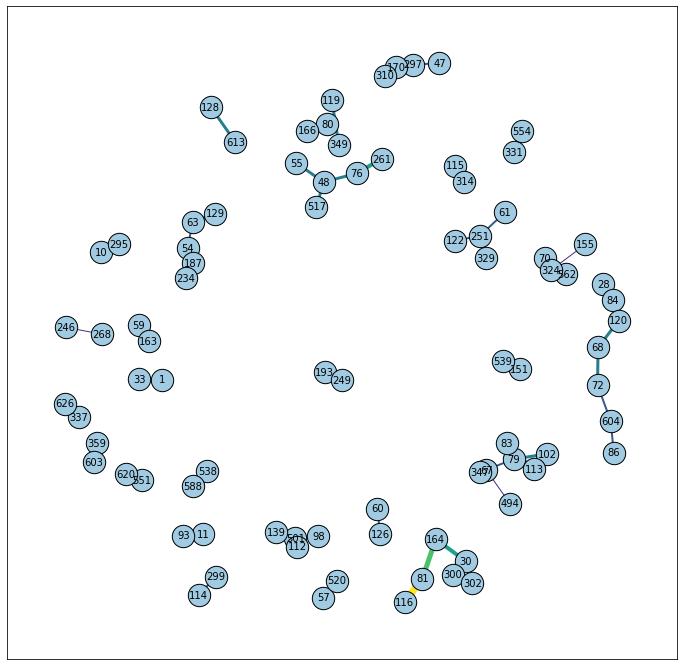

In [21]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df4, 'From', 'To', edge_attr=["Weight"])

# Compute positions for viz.
#pos = nx.spring_layout(G)

pos = nx.spring_layout(G, k=0.10, iterations=20, seed=63)

#viz = nx.draw_networkx(G, 
#                       pos, 
#                       with_labels=True, node_size=300,font_size=10)

# Show it as an interactive plot!
plt.figure(1, figsize=(12,12)) 

weights = [1 if G[u][v] == {} else G[u][v]['Weight'] for u,v in G.edges()]

# extract the edge weight
edge_colors = [a['Weight'] for u,v, a in G.edges(data=True)]


nx.draw_networkx(G, 
                 pos, 
                 with_labels=True, 
                 node_size=500,
                 font_size=10,
                 font_weight='normal',
                 edgecolors="black",
                 width = weights,
                 node_color = "#A0CBE2",
                 edge_color=edge_colors,
                 edge_cmap=plt.cm.viridis,
                 edge_vmin=0, edge_vmax=np.max(edge_colors))

#labels = nx.get_edge_attributes(G,'Weight')
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

#nx.draw_networkx_nodes(G, pos=pos)
#nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors, edge_cmap=plt.cm.viridis, edge_vmin=0, edge_vmax=np.max(edge_colors), width=5)
#nx.draw_networkx_labels(G, pos=pos);

plt.show()

# Go with this one

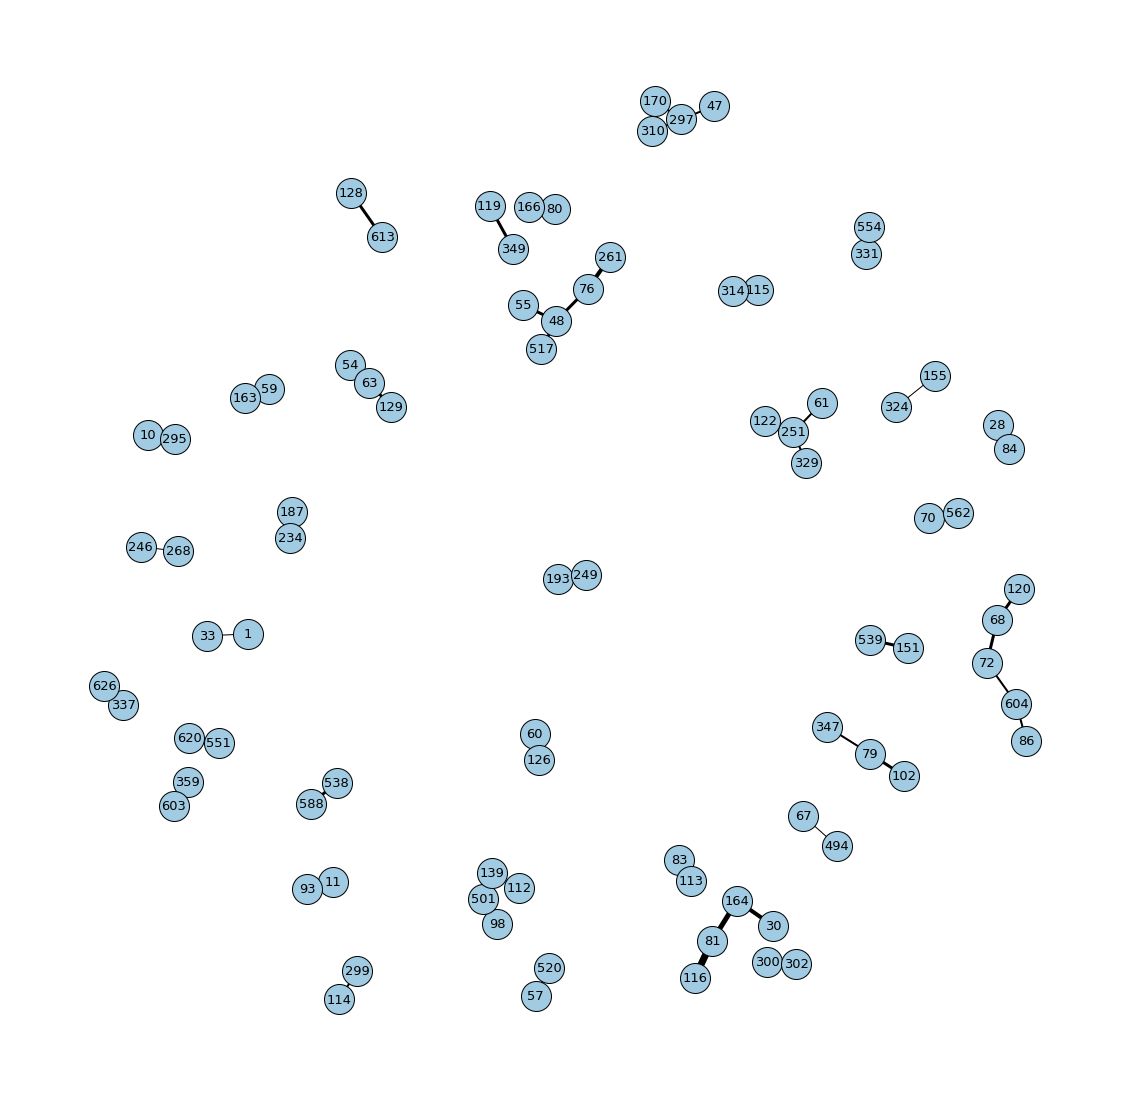

In [22]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df4, 'From', 'To', edge_attr=["Weight"])

# Compute positions for viz.
#pos = nx.spring_layout(G)

pos = nx.spring_layout(G, k=0.08, iterations=20, seed=63)

#viz = nx.draw_networkx(G, 
#                       pos, 
#                       with_labels=True, node_size=300,font_size=10)

# Show it as an interactive plot!
plt.figure(1, figsize=(20,20)) 

weights = [1 if G[u][v] == {} else G[u][v]['Weight'] for u,v in G.edges()]

# extract the edge weight
edge_colors = [a['Weight'] for u,v, a in G.edges(data=True)]


nx.draw_networkx(G, 
                 pos, 
                 with_labels=True, 
                 node_size=600*1.5,
                 font_size=10*1.3,
                 font_weight='normal',
                 edgecolors="black",
                 width = weights,
                 node_color = "#A0CBE2")

#labels = nx.get_edge_attributes(G,'Weight')
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

#nx.draw_networkx_nodes(G, pos=pos)
#nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors, edge_cmap=plt.cm.viridis, edge_vmin=0, edge_vmax=np.max(edge_colors), width=5)
#nx.draw_networkx_labels(G, pos=pos);
plt.axis("off")

plt.savefig("REM2_BGM.png")
         
plt.show()

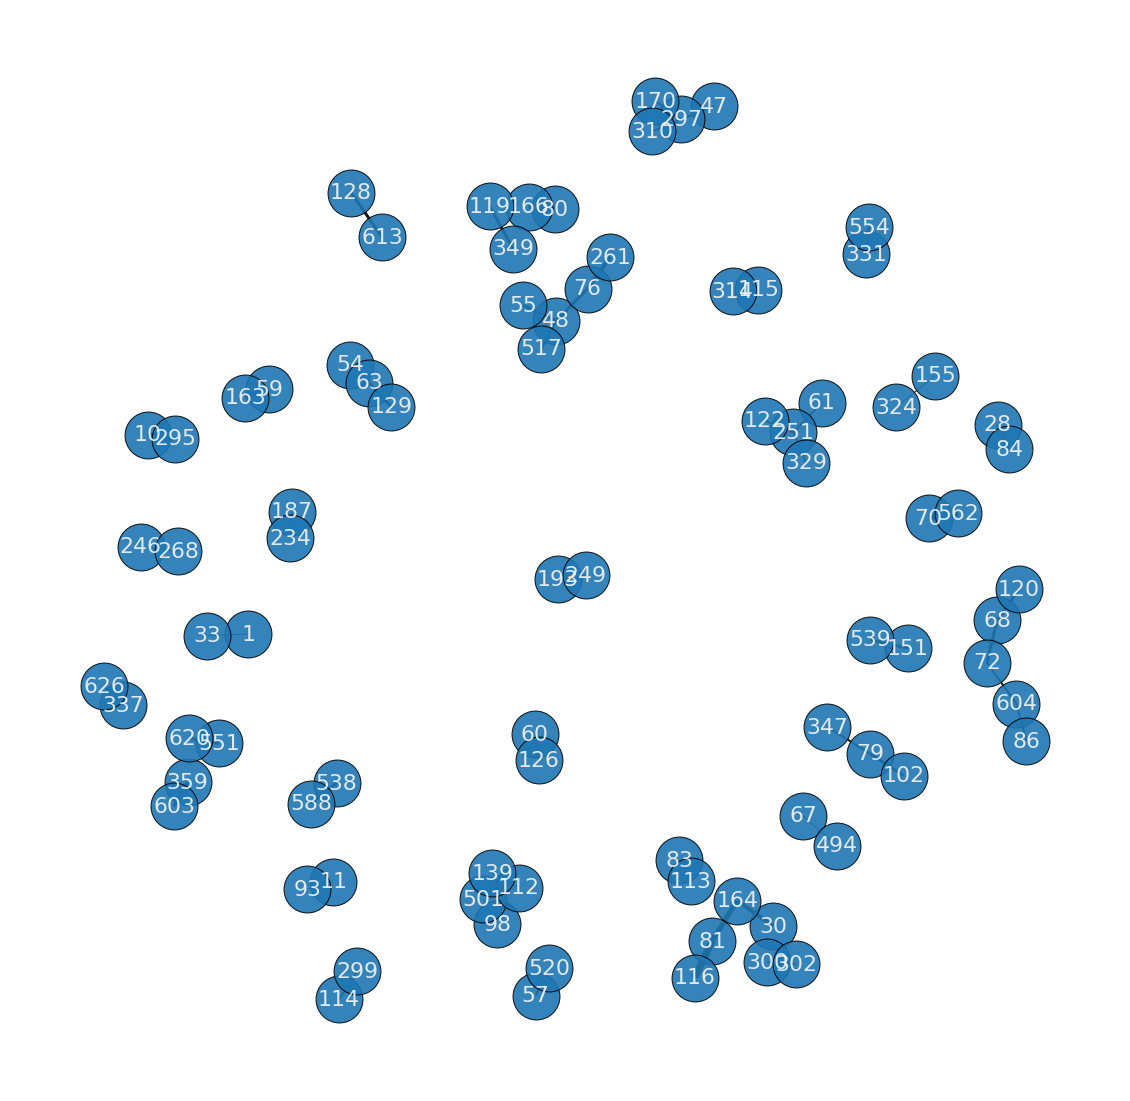

In [70]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df4, 'From', 'To', edge_attr=["Weight"])

# Compute positions for viz.
#pos = nx.spring_layout(G)

pos = nx.spring_layout(G, k=0.08, iterations=20, seed=63)

#viz = nx.draw_networkx(G, 
#                       pos, 
#                       with_labels=True, node_size=300,font_size=10)

# Show it as an interactive plot!
plt.figure(1, figsize=(20,20)) 

weights = [1 if G[u][v] == {} else G[u][v]['Weight'] for u,v in G.edges()]

# extract the edge weight
edge_colors = [a['Weight'] for u,v, a in G.edges(data=True)]


nx.draw_networkx(G, 
                 pos, 
                 with_labels=True, 
                 node_size=2200,
                 alpha=0.9,
                 font_size=22,
                 font_weight='normal',
                 font_color="whitesmoke",
                 edgecolors="black",
                 width = weights,
                 node_color = "tab:blue")


plt.figure(1, figsize=(20,20)) 
plt.axis("off")      
plt.show()

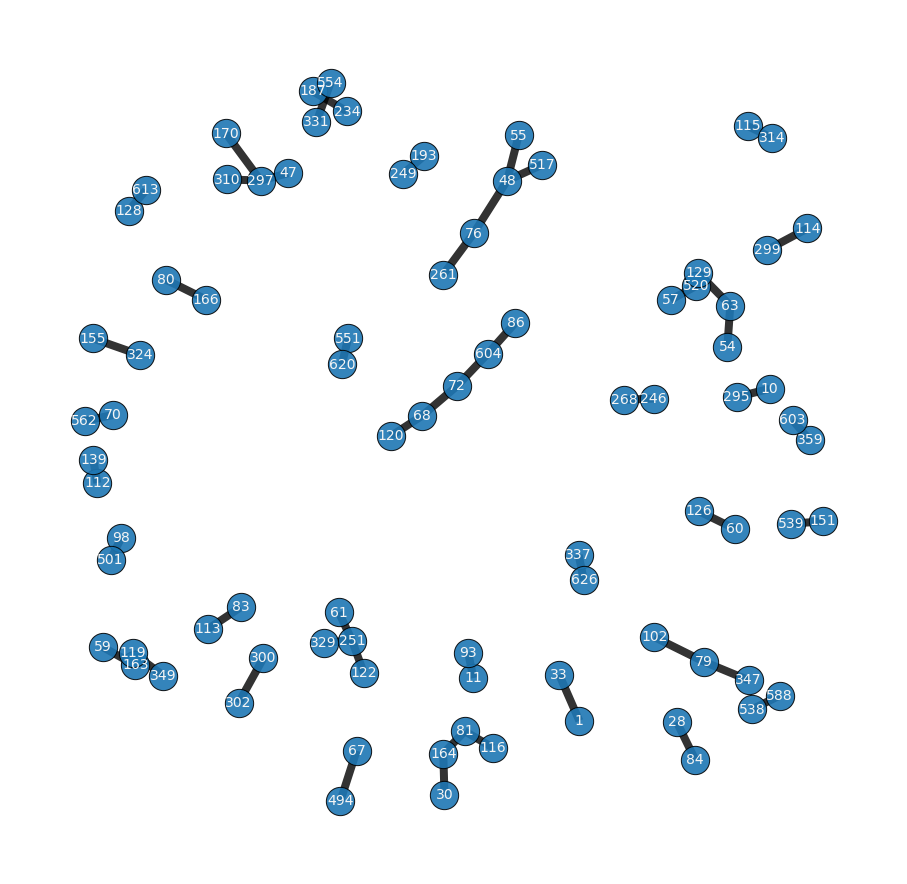

In [121]:
seed = 20532

G = nx.Graph()

G = nx.from_pandas_edgelist(df4, 
                            'From', 
                            'To', 
                            edge_attr=["Weight"])


# Compute positions for viz.
pos = nx.spring_layout(G, 
                       k=0.1, 
                       iterations=20, 
                       seed=seed)

plt.figure(1, figsize=(16, 16)) 

weights = [1 if G[u][v] == {} else G[u][v]['Weight'] for u, v in G.edges()]

# extract the edge weight
edge_colors = [a['Weight'] for u,v, a in G.edges(data=True)]

options = {"edgecolors": "black", 
           "node_size": 800, 
           "alpha": 0.9}

nx.draw_networkx_nodes(G, 
                 pos, 
                 node_color = "tab:blue",
                 **options)

nx.draw_networkx_edges(G, 
                 pos, 
                 width=8,
                 alpha=0.8,
                 edge_color="black")

labels = [x for x in pos.keys()]
labels_dict = {}
for item in labels:
    labels_dict[item] = item
    
nx.draw_networkx_labels(G, 
                        pos, 
                        labels_dict, 
                        font_size=14, 
                        font_color="whitesmoke")

plt.figure(1, figsize=(16, 16)) 
#plt.tight_layout()
plt.axis("off")
plt.show()

In [102]:
# Only Human
df5 = df4.copy()
df5 = df5.dropna()


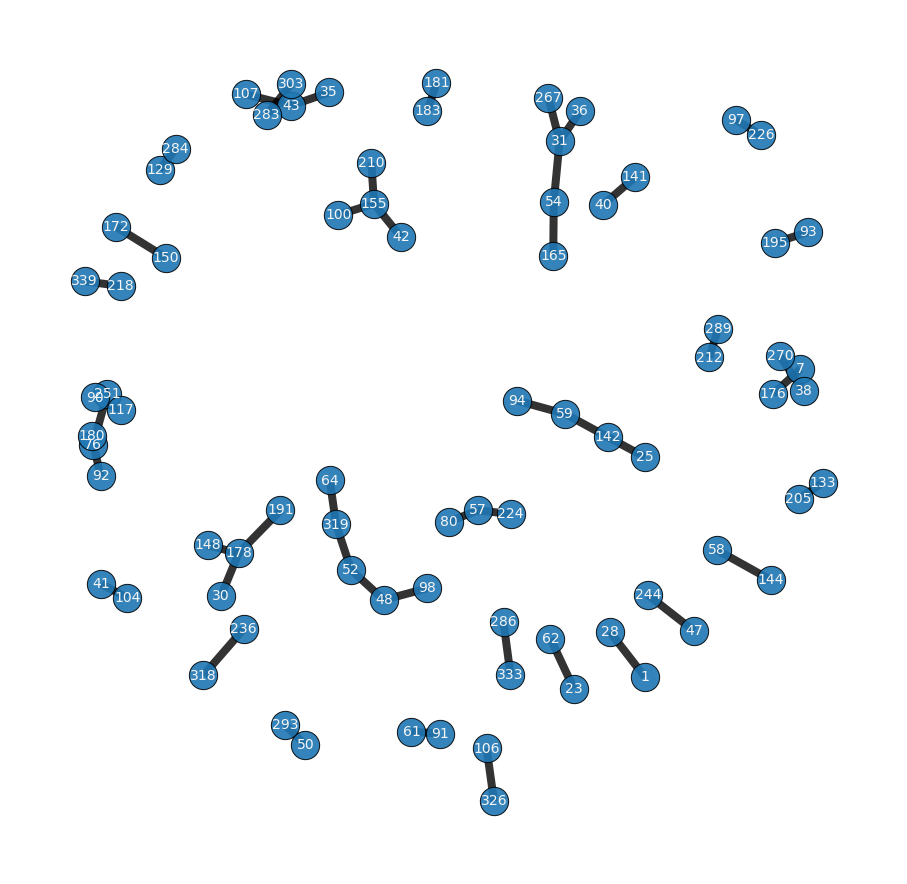

In [112]:
seed = 20532

df5 = df5.astype({'HumanREM2_Site_1':'int'})
df5 = df5.astype({'HumanREM2_Site_2':'int'})
G = nx.Graph()

G = nx.from_pandas_edgelist(df5, 
                            'HumanREM2_Site_1', 
                            'HumanREM2_Site_2', 
                            edge_attr=["Weight"])


# Compute positions for viz.
pos = nx.spring_layout(G, 
                       k=0.15, 
                       iterations=30, 
                       seed=seed)

plt.figure(1, figsize=(16, 16)) 

weights = [1 if G[u][v] == {} else G[u][v]['Weight'] for u, v in G.edges()]

# extract the edge weight
edge_colors = [a['Weight'] for u,v, a in G.edges(data=True)]

options = {"edgecolors": "black", 
           "node_size": 800, 
           "alpha": 0.9}

nx.draw_networkx_nodes(G, 
                 pos, 
                 node_color = "tab:blue",
                 **options)

nx.draw_networkx_edges(G, 
                 pos, 
                 width=8,
                 alpha=0.8,
                 edge_color="black")

labels = [x for x in pos.keys()]
labels_dict = {}
for item in labels:
    labels_dict[item] = item
    
nx.draw_networkx_labels(G, 
                        pos, 
                        labels_dict, 
                        font_size=14, 
                        font_color="whitesmoke")

plt.figure(1, figsize=(16, 16)) 
#plt.tight_layout()
plt.axis("off")
plt.show()

In [72]:
pos

{1: array([ 0.32628023, -0.71374601]),
 33: array([ 0.29554637, -0.64009335]),
 10: array([0.93825452, 0.19117732]),
 295: array([0.83763759, 0.16469369]),
 11: array([ 0.01061699, -0.48220847]),
 93: array([-0.03204231, -0.44390283]),
 28: array([ 0.66143633, -0.75058849]),
 84: array([ 0.67365611, -0.820251  ]),
 30: array([ 0.02781045, -0.95326478]),
 164: array([ 0.01656316, -0.85934012]),
 47: array([-0.45773472,  0.76232493]),
 297: array([-0.51415941,  0.72773713]),
 48: array([0.14736298, 0.6486493 ]),
 55: array([0.16322538, 0.7582222 ]),
 76: array([0.08719259, 0.54924318]),
 517: array([0.21856148, 0.7099171 ]),
 54: array([0.70527412, 0.33413581]),
 63: array([0.71483056, 0.40484364]),
 57: array([0.52765373, 0.45470827]),
 520: array([0.55071523, 0.5270109 ]),
 59: array([-0.9910412 , -0.52954979]),
 163: array([-0.93026851, -0.52527015]),
 60: array([ 0.72287619, -0.11089076]),
 126: array([ 0.70513021, -0.05064661]),
 61: array([-0.32787212, -0.42034482]),
 251: array([-

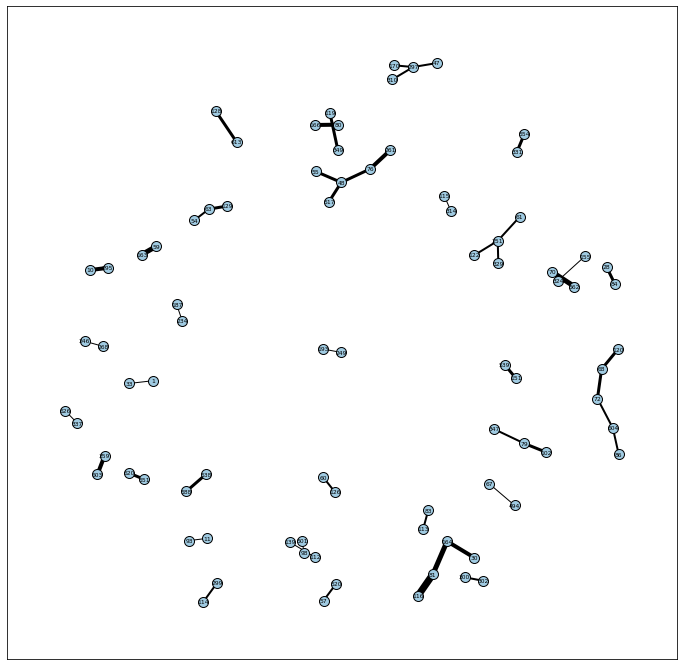

In [23]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df4, 'From', 'To', edge_attr=["Weight"])

# Compute positions for viz.
#pos = nx.spring_layout(G)

pos = nx.spring_layout(G, k=0.09, iterations=20, seed=63)

#viz = nx.draw_networkx(G, 
#                       pos, 
#                       with_labels=True, node_size=300,font_size=10)

# Show it as an interactive plot!
plt.figure(1, figsize=(12,12)) 

weights = [1 if G[u][v] == {} else G[u][v]['Weight'] for u,v in G.edges()]

# extract the edge weight
edge_colors = [a['Weight'] for u,v, a in G.edges(data=True)]


nx.draw_networkx(G, 
                 pos, 
                 with_labels=True, 
                 node_size=100,
                 font_size=6,
                 font_weight='normal',
                 edgecolors="black",
                 width = weights,
                 node_color = "#A0CBE2")

#labels = nx.get_edge_attributes(G,'Weight')
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

#nx.draw_networkx_nodes(G, pos=pos)
#nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors, edge_cmap=plt.cm.viridis, edge_vmin=0, edge_vmax=np.max(edge_colors), width=5)
#nx.draw_networkx_labels(G, pos=pos);

plt.show()

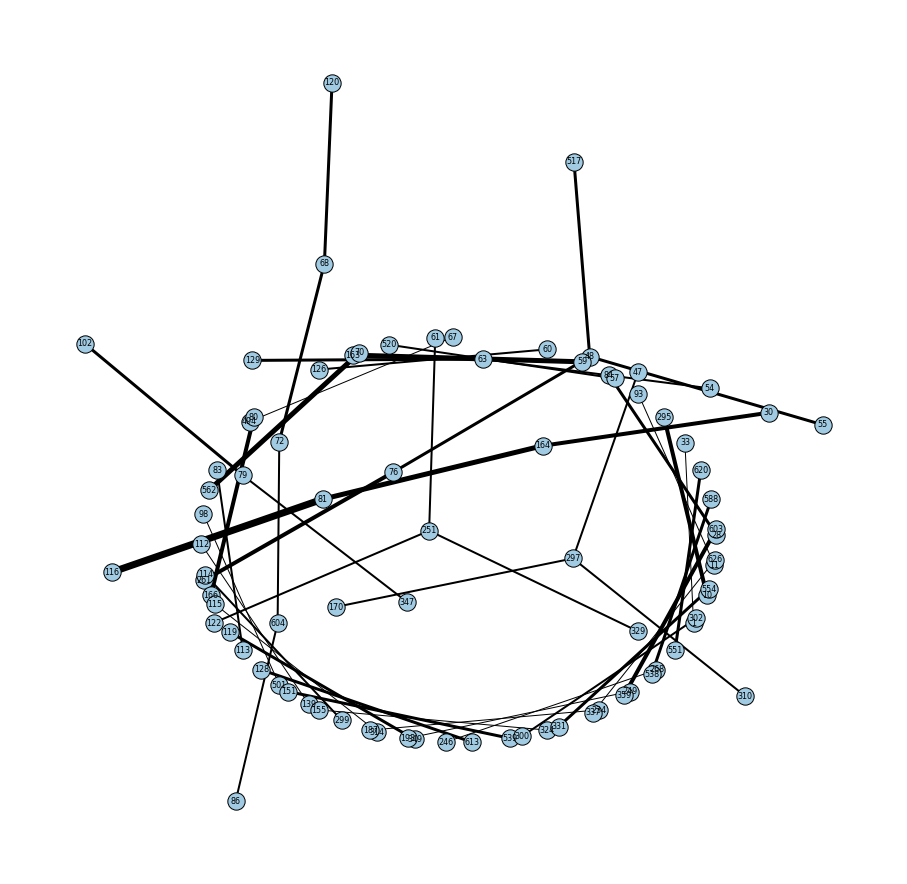

In [24]:
G  = nx.MultiDiGraph()
G = nx.from_pandas_edgelist(df4, 'From', 'To', edge_attr=["Weight"])

pos = nx.kamada_kawai_layout(G)

# Show it as an interactive plot!
plt.figure(1, figsize=(16,16)) 

weights = [1 if G[u][v] == {} else G[u][v]['Weight'] for u,v in G.edges()]

# extract the edge weight
edge_colors = [a['Weight'] for u,v, a in G.edges(data=True)]

nx.draw_networkx(G, 
                 pos, 
                 with_labels=True, 
                 node_size=300,
                 font_size=8,
                 font_weight='normal',
                 edgecolors="black",
                 width = weights,
                 node_color = "#A0CBE2")

#ax.margins(0.1, 0.05)
#fig.tight_layout()
plt.axis("off")
plt.show()

In [25]:
df4

,From,To,Weight,ProbS1andS2,HumanREM2_Site_1,HumanREM2_Site_2
25,1,33,1,0.593419,1.0,28.0
1660,10,295,4,0.726205,7.0,176.0
1827,11,93,1,0.753804,NaN,71.0
4971,28,84,3,0.697959,23.0,62.0
5494,30,164,4,0.577749,25.0,142.0
7136,47,297,2,0.605062,30.0,178.0
7250,48,55,3,0.693158,31.0,36.0
7268,48,76,3,0.559787,31.0,54.0
7421,48,517,3,0.878330,31.0,267.0
8151,54,63,2,0.514513,35.0,43.0
